# Logistic Regression

## Marcin Biela

In [1353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [1354]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [1355]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [1356]:
# added column with values '1'
d_len = len(data)
data.insert(0, "Ones", 1)
data.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [1357]:
# Ex 4 - We need to separate our data into independent variables X (column 0,1 2) and our dependent variable y (col. 3).
X = data[['Ones', 'Exam 1', "Exam 2"]]
y = data['Admitted']

In [1358]:
# Division by y-dependent variable to 2 classes 
admitted = data.loc[y==1]
not_admitted = data.loc[y==0]

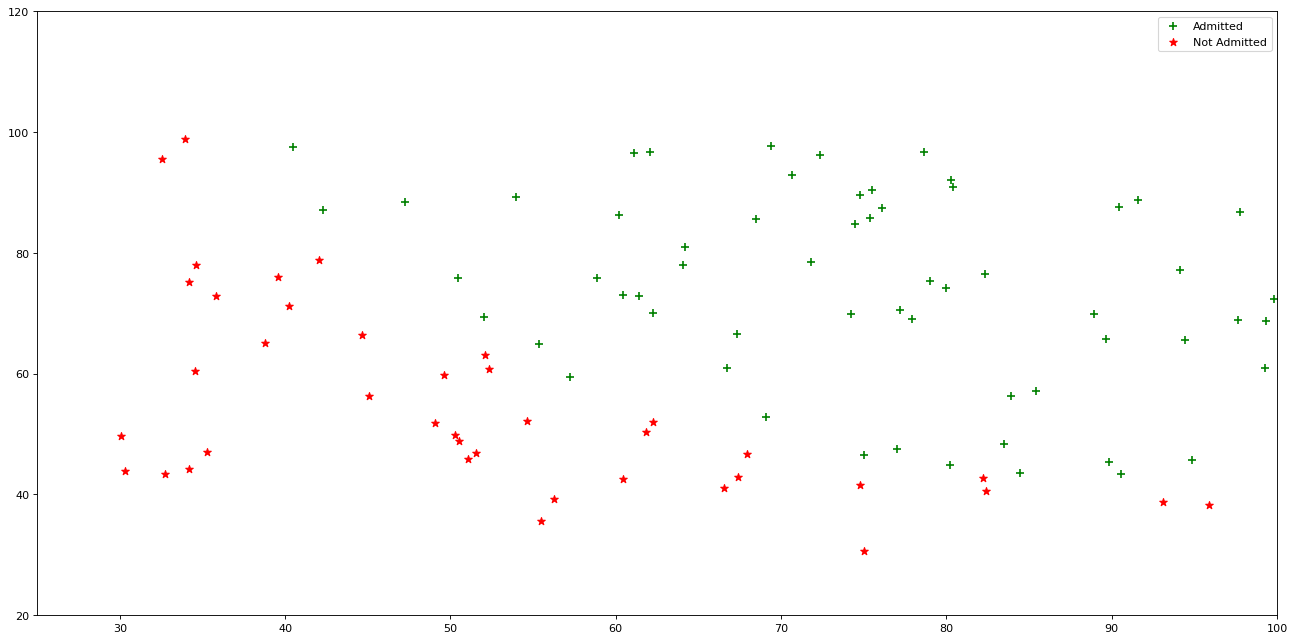

In [1359]:
# Ex. 2.: Please plot the loaded data in the graph (using scatter plot). Can be both: a 2D plot with marks colored regarding to the class or a 3D plot with the class showed as 3rd dimension.

plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(admitted.iloc[:, 1], admitted.iloc[:, 2], s=50, label='Admitted', color='g', marker='+')
plt.scatter(not_admitted.iloc[:, 1], not_admitted.iloc[:, 2], s=50, label="Not Admitted", color='r', marker='*')
plt.ylim([20, 120])
plt.xlim([25, 100])
plt.legend()
plt.show()

In [1360]:
# Sigmoind function
def sig(t):
    return 1/(1+np.exp(-t))

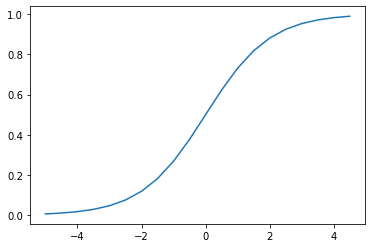

In [1361]:
# Ex. 4.: Using the function np.arange or np.linspace, please generate data from the range [-5.5], step 0.5 and check the correct operation of the implemented function by plotting it. 
x_sig = np.arange(-5, 5, 0.5)
y_sig = sig(x_sig)
plt.figure()
plt.plot(x_sig, y_sig)
plt.show()

In [1362]:
# Ex. 5. Based on the above formulas, please implement the cost function J (recommended vectorized solution):

def Cost(X, y, theta):
    predictions = sig(np.dot(X, theta))
    m = y.shape[0]
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    return cost

In [1363]:
# Changing variable type to numpy array and creating a theta variable
X_t = np.array(X.values, dtype=float)
y_t = np.array(y.values, dtype=float)
theta_t = np.zeros(3)

In [1364]:
# Testing cost function
test1 = Cost(X_t, y_t, theta_t)
print(test1)

0.693147180559946


In [1365]:
# Standatyzacja danych
X_t[:, 1:] = (X_t[:, 1:] - X_t[:, 1:].mean(0)) / X_t[:, 1:].std(0)

In [1366]:
# Ex. 6.: Implementation of simple gradient function:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    m = y.shape[0]
    J = []
    for i in range(it):
        cost = Cost(X, y, theta)
        gradient = 1/m * np.dot(X.T, sig(np.dot(X, theta)) - y)
        theta = theta - (alpha*gradient)
        J.append(cost)
    return theta, J

In [1367]:
# evaluate theta and cost output
theta_opt, cost_output = simple_gradient(X_t, y_t, theta_t, alpha=1, it=350)
print("theta: ", theta_opt)
print("Best cost: ", cost_output[-1])

theta:  [1.63839781 3.82219573 3.5600815 ]
Best cost:  0.20368880887393004


**Ex. 7.**: Please present the accuracy of the algorithm performance. Prediction values will be in the range [0; 1]. Threshold value = 0.5. 

In [1368]:
pred_thresh = 0.5
prediction = ((X_t @ theta_opt) > pred_thresh).astype(int)
prediction

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

**Accuracy**

In [1369]:
difference = y-prediction.T
diff = difference >= 0
diff.value_counts()

True     96
False     4
Name: Admitted, dtype: int64

In [1370]:
# 1 - sum(train - prediction)/num_of_predictions
accuracy = (1 - np.abs(difference).sum() / prediction.shape[0]) * 100

print(f"Accuracy: {accuracy}%")

Accuracy: 88.0%


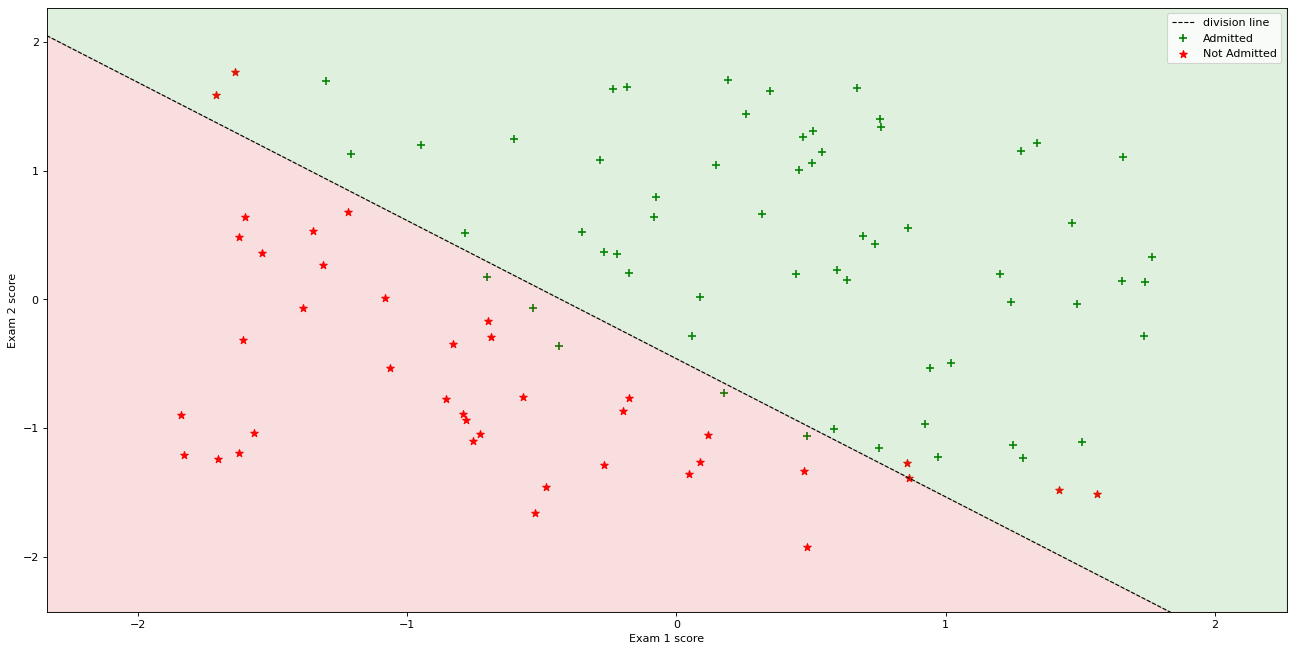

In [1371]:
plt.figure(figsize=(20, 10), dpi=80)

plt.scatter(X_t[y==1, 1], X_t[y==1, 2], s=50, c='g', marker="+", label="Admitted")
plt.scatter(X_t[y==0, 1], X_t[y==0, 2], s=50, c='r', marker="*", label="Not Admitted")

b = theta_opt[0]
m = -theta_opt[1]/theta_opt[2]
c = -b/theta_opt[2]

x_values = np.array([np.min(X_t[:, 1]-0.5), np.max(X_t[:, 1]+0.5)])
y_values = m*x_values+c

y_min = np.min(X_t[:, 2]-0.5)
y_max = np.max(X_t[:, 2]+0.5)

plt.plot(x_values, y_values, 'k', lw=1, ls='--', label='division line')
plt.fill_between(x_values, y_values, y_min, color='tab:red', alpha=0.15)
plt.fill_between(x_values, y_values, y_max, color='tab:green', alpha=0.15)
plt.xlim(x_values)
plt.ylim([y_min, y_max])
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()

# Multi-class logistic regression

In [1372]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

In [1373]:
print(X.shape)
print(Y.shape)

(150, 2)
(150,)


In [1374]:
# Normalize dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [1375]:
from sklearn.model_selection import train_test_split

# Split data to test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [1376]:
# Creating LogisticRegression Model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<ipython-input-1377-61fa4f67098d>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


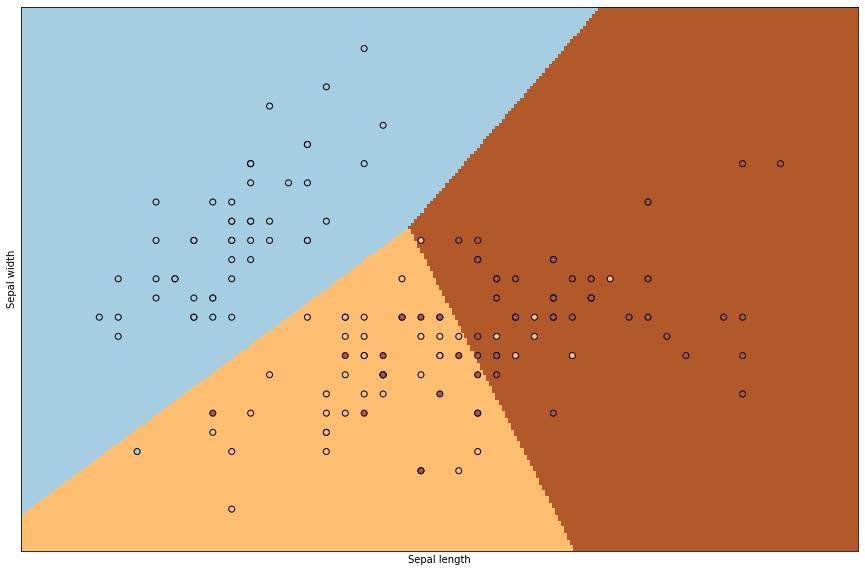

In [1377]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15, 10))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

In [1378]:
# predict_proba returns the class probabilities for each data point 
pred_proba = model.predict_proba(X_test)
first_20th_prediction = np.around(pred_proba[:20,:], 2)
first_20th_prediction

# each row represent a point and each column represent a class. any value represent a probability with which the given point belongs to the given class 
# sum of values in each row must 1

array([[0.01, 0.55, 0.44],
       [0.87, 0.07, 0.06],
       [0.  , 0.15, 0.85],
       [0.02, 0.56, 0.42],
       [0.  , 0.34, 0.66],
       [0.78, 0.15, 0.07],
       [0.12, 0.61, 0.27],
       [0.  , 0.27, 0.73],
       [0.  , 0.62, 0.38],
       [0.02, 0.65, 0.33],
       [0.01, 0.36, 0.63],
       [0.84, 0.13, 0.02],
       [0.79, 0.13, 0.08],
       [0.86, 0.12, 0.02],
       [0.99, 0.01, 0.  ],
       [0.04, 0.39, 0.57],
       [0.  , 0.39, 0.6 ],
       [0.02, 0.73, 0.25],
       [0.05, 0.64, 0.31],
       [0.  , 0.46, 0.54]])

 Evaluation - please assess the accuracy of the algorithms using a variety of metrics (at least 2).

In [1379]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, jaccard_score

predictions_y = model.predict(X_test)

print(f"Accuracy score: {round(accuracy_score(y_test, predictions_y), 4)}")

print(f"Balanced accuracy score: {round(balanced_accuracy_score(y_test, predictions_y), 4)}")

print(f"Recall score: {round(recall_score(y_test, predictions_y, average='weighted'), 4)}")

print(f"Jaccard score: {round(jaccard_score(y_test, predictions_y, average='weighted'), 4)}")

Accuracy score: 0.9
Balanced accuracy score: 0.8956
Recall score: 0.9
Jaccard score: 0.8254


# Conclusion

In this chapter I learned how to create a Linear Regression models for one and multiple features. Logistic Regression is a useful analysis method for classification problems, where you are trying to assign the sample to a category.